Парсинг датасета и визуализация данных

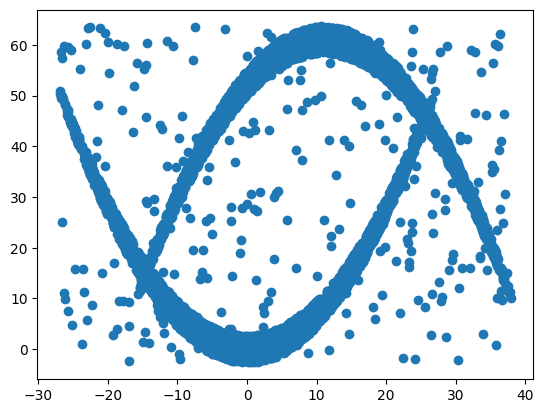

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

f = open("hs.dat")
d = []
for s in f:
  d.append([float(x) for x in s.split()])
d = np.array(d)

X = d[:, 0]
Y = d[:, 1]
plt.scatter(X, Y)

Метод кластеризации DBSCAN. Оценка качества производится метрикой calinski_harabasz_score

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score
best_eps = 0
best_score = -1
best_labels = None
best_n_clusters = 0
best_n_noise = 0
for eps in np.arange(0.1, 15, 0.5):
  db = DBSCAN(eps=eps)
  db_labels = db.fit_predict(d)
  unique_labels = set(db_labels)
  n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
  n_noise = list(db_labels).count(-1)
  if n_clusters >= 2:
    mask = db_labels != -1
    if np.sum(mask) > 1:
      dbscore = calinski_harabasz_score(d, db_labels)
      print(f"Значение гиперпараметра: {eps}, calinski_harabasz_score: {dbscore}")
      if dbscore > best_score:
        best_score = dbscore
        best_eps = eps
        best_labels = db_labels.copy()
        best_n_clusters = n_clusters
        best_n_noise = list(db_labels).count(-1)
print(f"Best eps: {best_eps}")
print(f"Best score: {best_score}")
print(f"Number of clusters: {best_n_clusters}")
print(f"Noise points: {best_n_noise}")

Значение гиперпараметра: 0.1, calinski_harabasz_score: 22.083095286716986
Значение гиперпараметра: 0.6, calinski_harabasz_score: 34.412867529500566
Значение гиперпараметра: 1.6, calinski_harabasz_score: 6.07513847560632
Значение гиперпараметра: 2.1, calinski_harabasz_score: 3.3946566213537532
Значение гиперпараметра: 2.6, calinski_harabasz_score: 3.5870698852732006
Значение гиперпараметра: 3.1, calinski_harabasz_score: 7.328292073487359
Значение гиперпараметра: 3.6, calinski_harabasz_score: 12.06903799094587
Значение гиперпараметра: 4.1, calinski_harabasz_score: 13.28250819577267
Значение гиперпараметра: 4.6, calinski_harabasz_score: 22.285474931424094
Best eps: 0.6
Best score: 34.412867529500566
Number of clusters: 7
Noise points: 269


Визуализация кластеризованного датасета.

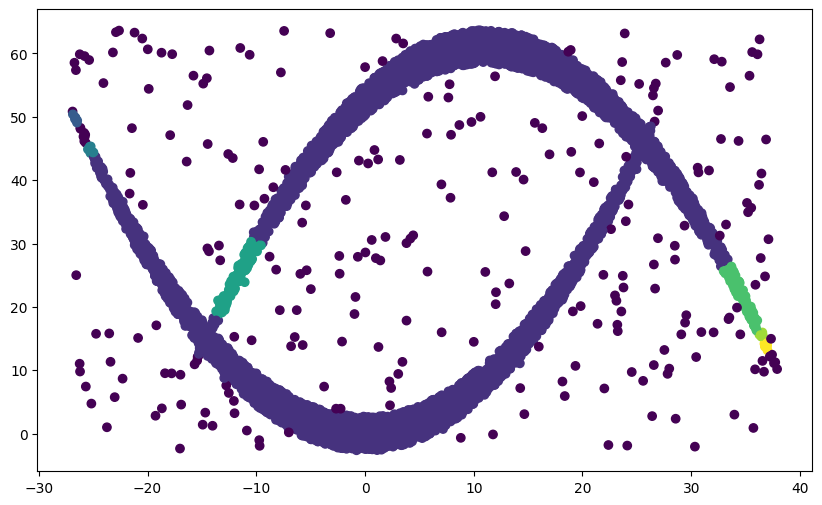

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=best_labels)
# noise_mask = best_labels == -1
# plt.scatter(X[noise_mask], Y[noise_mask], c='red', marker='x', s=100, linewidth=2)

Метод кластеризации KMEANS. Оценка качества производится метрикой silhouette_score

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
best_k = 1
best_score = -1
best_clf = None
for k in range(2, 10):
  clf = KMeans(n_clusters=k).fit_predict(d)
  kmscore = silhouette_score(d, clf)
  if kmscore > best_score:
    best_score = kmscore
    best_k = k
    best_clf = clf
print(f"Best n clusters: {best_k}")
print(f"Best score: {best_score}")

Best n clusters: 2
Best score: 0.6493534904849313


Визуализация кластеризованного датасета

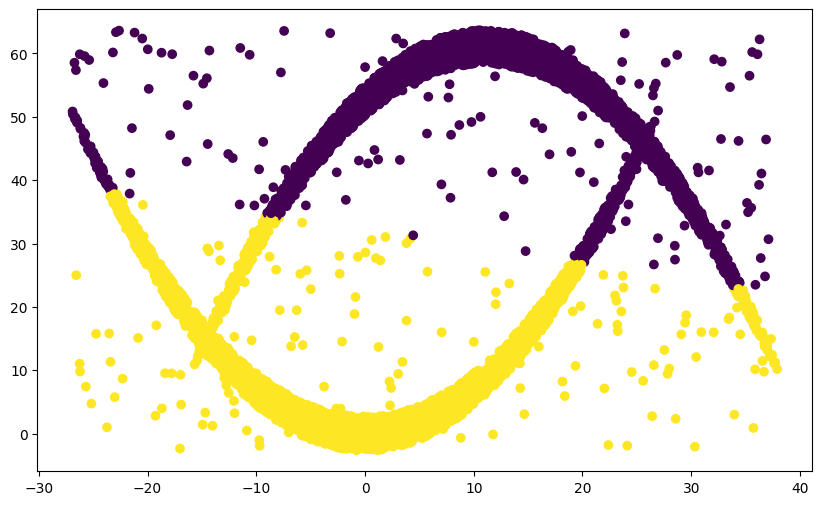

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=best_clf)
noise_mask = best_clf == -1
plt.scatter(X[noise_mask], Y[noise_mask], c='red', marker='x', s=100, linewidth=2)

Метод кластеризации GaussianMixture. Оценка качества производится метрикой bic

In [ ]:
from sklearn.mixture import GaussianMixture
best_n_components = 0
best_bic = 1000000
best_GM_labels = None
for n in range(1, 10):
  clf = GaussianMixture(n_components=n).fit(d)
  labels = clf.predict(d)
  bic_score = clf.bic(d)
  if bic_score < best_bic:
    best_bic = bic_score
    best_GM_labels = labels
    best_n_components = n
print(f"Best n components: {best_k}")
print(f"Best bic: {best_bic}")
print(f"Clusters: {len(list(set(labels)))}")

Best n components: 2
Best bic: 134499.43755898706
Clusters: 9


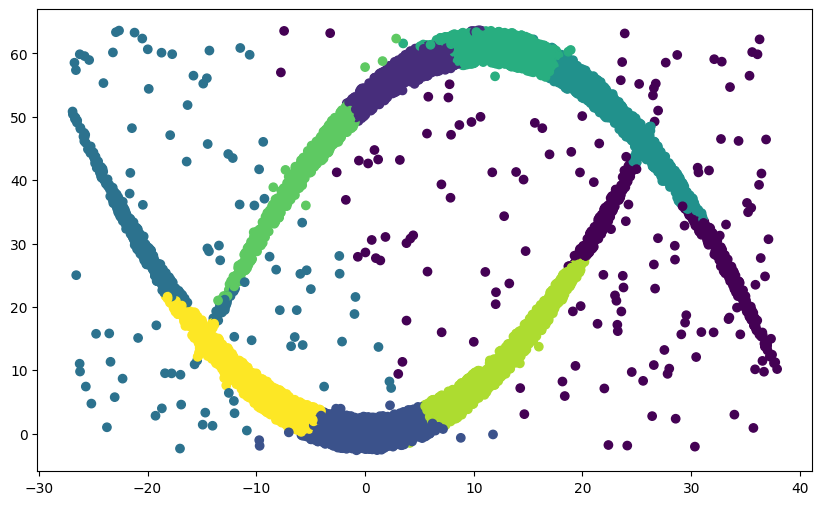

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=best_GM_labels)
noise_mask = best_GM_labels == -1
plt.scatter(X[noise_mask], Y[noise_mask], c='red', marker='x', s=100, linewidth=2)

Метод кластеризации AgglomerativeClustering. Оценка качества производится метрикой davies_bouldin_score

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

best_k = 0
best_AC_clf = None
best_score = 10000
for k in range(2, 10):
  clf = AgglomerativeClustering(n_clusters=k).fit_predict(d)
  score = davies_bouldin_score(d, clf)
  if score < best_score:
    best_score = score
    best_AC_clf = clf
    best_k = k
print(f"Best k: {best_k}")
print(f"Best score: {best_score}")

Best k: 2
Best score: 0.5408144292222365


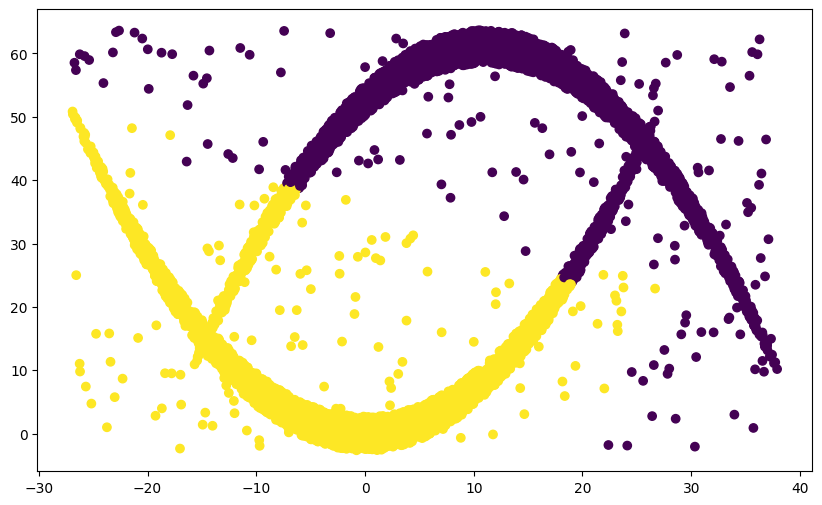

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=best_AC_clf)
noise_mask = best_AC_clf == -1
plt.scatter(X[noise_mask], Y[noise_mask], c='red', marker='x', s=100, linewidth=2)

Метод кластеризации OPTICS. Оценка производится метрикой adjusted_rand_score

In [ ]:
from sklearn.cluster import OPTICS
from sklearn.metrics import adjusted_rand_score

true_labels = (d[:, 0] > np.median(d[:, 0])).astype(int)

best_min_samples = 0
best_score = -1
best_clf = None
for i in range(2, 55, 5):
  clf = OPTICS(min_samples=i).fit_predict(d)
  ari = adjusted_rand_score(true_labels, clf)
  print(f"min_samples = {i}, ari = {ari}")
  if ari > best_score:
    best_score = ari
    best_min_samples = i
    best_clf = clf
print(f"Best min_samples: {best_min_samples}")
print(f"Best score: {best_score}")

min_samples = 2, ari = 0.0006000928447835836
min_samples = 7, ari = 0.0010888345655775883
min_samples = 12, ari = 0.002410684783314904
min_samples = 17, ari = 0.0013386643455379774
min_samples = 22, ari = 0.0013115073202230082
min_samples = 27, ari = 0.0008377860222908477
min_samples = 32, ari = 0.0004707775164426228
min_samples = 37, ari = 0.0002717157612269289
min_samples = 42, ari = 0.0006207707443473844
min_samples = 47, ari = 0.0016608808150461128
min_samples = 52, ari = 0.0005570180810489832
Best min_samples: 12
Best score: 0.002410684783314904


In [ ]:
print(f"Clusters: {len(set(best_clf))}")

Clusters: 122


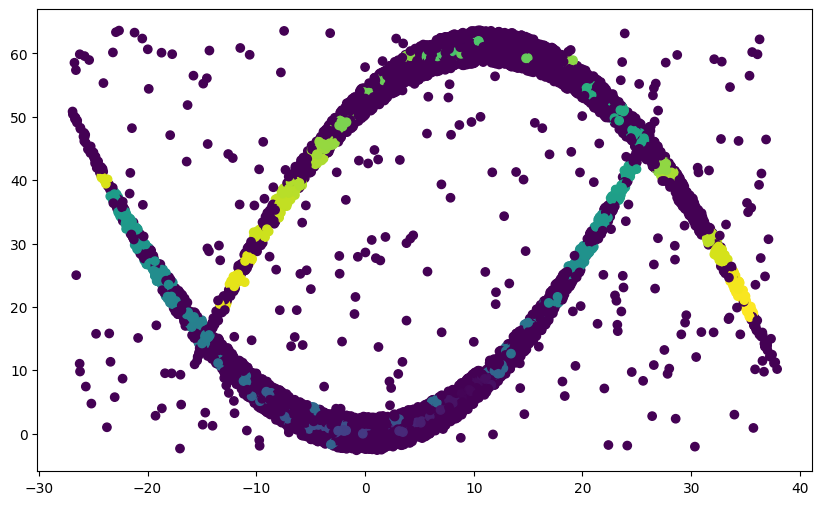

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=best_clf)


Метод кластеризации GMSDB

In [ ]:
!pip install gmsdb

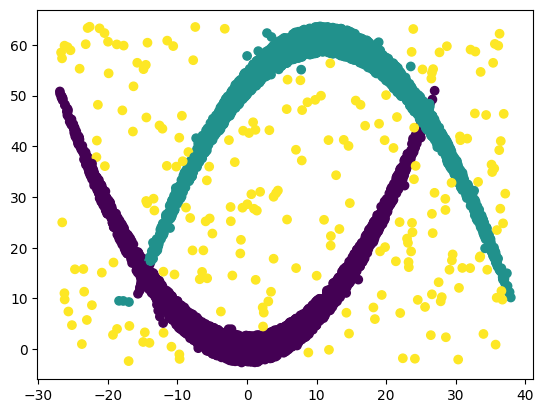

In [ ]:
from gmsdb import GMSDB
clf = GMSDB(n_components=20).fit_predict(d)
plt.scatter(X, Y, c=clf)

Метод кластеризации SpectralClustering. Оценка с помощью adjusted_mutual_info_score

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_mutual_info_score

best_n_clusters = 0
best_score = -1
best_clf = None

for n in range(2, 10):
  clf = SpectralClustering(n_clusters=n, affinity='nearest_neighbors').fit_predict(d)
  score = adjusted_mutual_info_score(true_labels, clf)
  print(f"Current score: {score}")
  if score > best_score:
    best_score = score
    best_n_clusters = n
    best_clf = clf
print(f"Clusters: {best_n_clusters}")
print(f"Best score: {best_score}")

Current score: 0.15051674641910445
Current score: 0.2727140468271696
Current score: 0.5580434331809799
Current score: 0.432264937885182
Current score: 0.4537621800900727
Current score: 0.4650889247757382
Current score: 0.42988153386581573
Current score: 0.4015191456089931
Clusters: 4
Best score: 0.5580434331809799


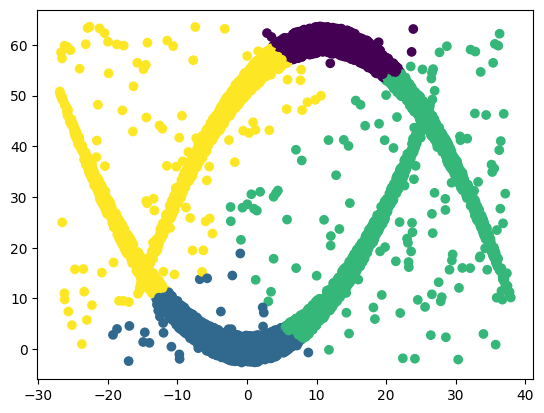

In [ ]:

plt.scatter(X, Y, c=best_clf)